# Convolutional Neural Network

1. Data collection
2. Image preprocessing
	1. Import image data generator
	2. Configure the image data generator class
	3. Apply image data generator functionality to my data
3. Model building
	1. Import all the necessary model building libraries
	2. Initiliaze the model
	3. Add convolution layer(no.of filters,size of filter,input shape,activation function)
	4. Max pooling layer(pool_size)
	5. Add flatten layer (input of ann)
	6. Add hidden layer(no.of neurons,activation function=relu)
	7. Add output layer(no.of output clasees,activation=sotmax
	8. Compile the model(loss,optimizer,metrics)
	9. Fit the model (x_train,steps per epoch,epochs,validation_data)
4. Save the model
5. Random value prediction

## Import necessary libraries

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

## Image preprocessing

In [13]:
from keras.preprocessing.image import ImageDataGenerator

#Configuring the image data generator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

#Apply image data generator functionality to train and test images
x_train = train_datagen.flow_from_directory(r'C:\Users\Siri\Anaconda_files\cnn_dataset\dataset\Training', target_size = (64, 64), batch_size = 32, class_mode = "categorical")
x_test = test_datagen.flow_from_directory(r'C:\Users\Siri\Anaconda_files\cnn_dataset\dataset\Testing', target_size = (64, 64), batch_size = 32, class_mode = "categorical")

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [14]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


## Model Building

In [15]:
#initialising the model
model = Sequential()

#add the convolution layer.
#parameters = number of filters, size of filter, input shape
model.add(Convolution2D(32, (3,3), input_shape = (64, 64, 3), activation = 'relu'))

#add max pool layer
model.add(MaxPooling2D(pool_size = (2, 2)))

#add flatten layer
model.add(Flatten())

#add hidden layer
model.add(Dense(units = 128, activation = 'relu'))

#add output layer
model.add(Dense(units = 4, activation = 'softmax'))

#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = 'accuracy')

In [16]:
#fit the model
model.fit(x_train, steps_per_epoch = 39, epochs = 50, validation_data = x_test, validation_steps = 10)

Epoch 1/50
39/39 [==============================] - 12s 289ms/step - loss: 1.6925 - accuracy: 0.3643 - val_loss: 1.2697 - val_accuracy: 0.4375
Epoch 2/50
39/39 [==============================] - 11s 281ms/step - loss: 1.0899 - accuracy: 0.5565 - val_loss: 0.9596 - val_accuracy: 0.5938
Epoch 3/50
39/39 [==============================] - 11s 288ms/step - loss: 0.9010 - accuracy: 0.6583 - val_loss: 0.7264 - val_accuracy: 0.7312
Epoch 4/50
39/39 [==============================] - 11s 285ms/step - loss: 0.8094 - accuracy: 0.6906 - val_loss: 0.7548 - val_accuracy: 0.6750
Epoch 5/50
39/39 [==============================] - 11s 288ms/step - loss: 0.7426 - accuracy: 0.7213 - val_loss: 0.5407 - val_accuracy: 0.8094
Epoch 6/50
39/39 [==============================] - 11s 283ms/step - loss: 0.6312 - accuracy: 0.7617 - val_loss: 0.6188 - val_accuracy: 0.7656
Epoch 7/50
39/39 [==============================] - 11s 273ms/step - loss: 0.5738 - accuracy: 0.7892 - val_loss: 0.5702 - val_accuracy: 0.7969

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3936384   
                                                                 
 dense_5 (Dense)             (None, 4)                 516       
                                                                 
Total params: 3937796 (15.02 MB)
Trainable params: 3937796 (15.02 MB)
Non-trainable params: 0 (0.00 Byte)
______________

For Convolution layers,
<br> `number of filters * (input channels * window size + 1) = number of parameters`
<br>
<br> For Flatten layers,
<br>`output size * (input size + 1) =number of parameters`

In [19]:
model.evaluate(x_test)

11/11 [==============================] - 1s 117ms/step - loss: 0.0639 - accuracy: 0.9877


[0.06387486308813095, 0.987730085849762]

## Save the model

In [21]:
model.save("convolutional_neural_network.h5")

C:\Users\Siri\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Random Value Prediction

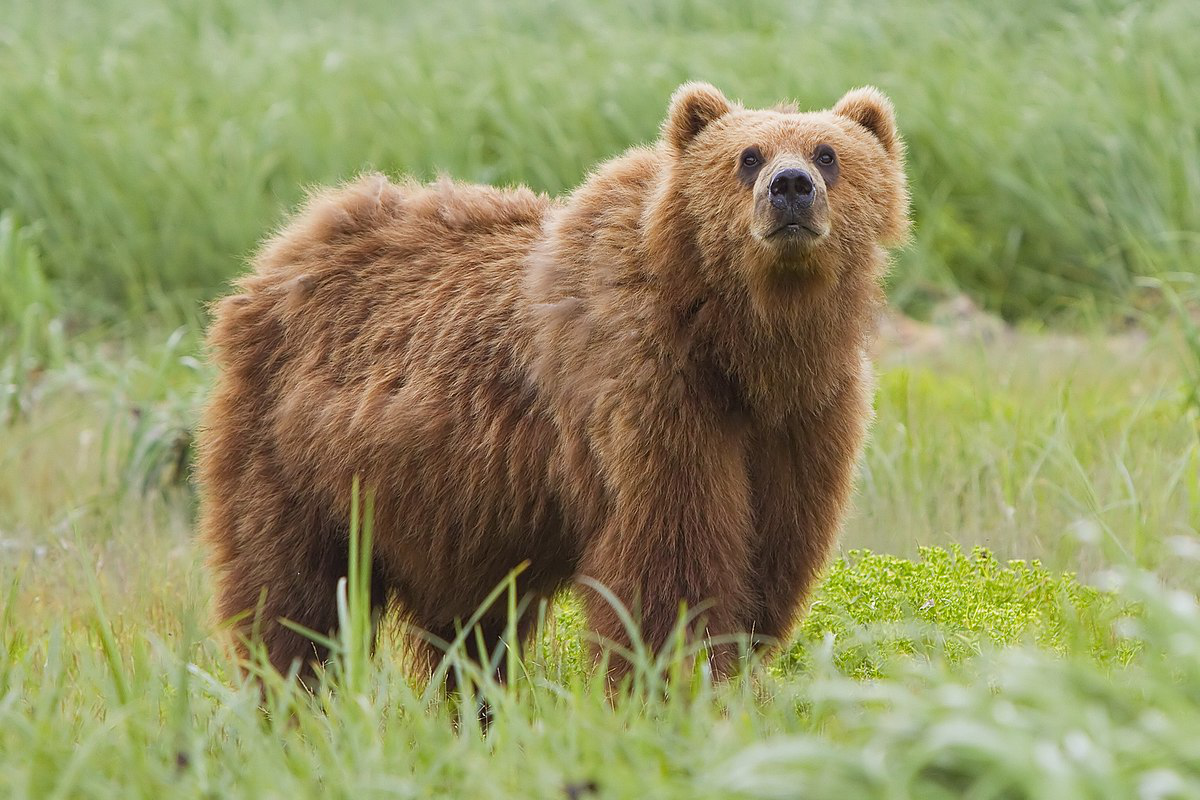

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf

model = tf.keras.models.load_model(r"C:\Users\Siri\Anaconda_files\convolutional_neural_network.h5", compile = False)

test_image = image.load_img(r"C:\Users\Siri\Anaconda_files\Bear_test_image.jpg")
test_image

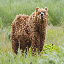

In [25]:
test_image = image.load_img(r"C:\Users\Siri\Anaconda_files\Bear_test_image.jpg", target_size = (64, 64))
test_image

In [26]:
image_array = image.img_to_array(test_image)
image_array

array([[[160., 182., 136.],
        [166., 185., 139.],
        [164., 181., 139.],
        ...,
        [144., 168., 116.],
        [176., 192., 155.],
        [173., 190., 154.]],

       [[166., 188., 142.],
        [162., 186., 138.],
        [168., 185., 141.],
        ...,
        [173., 188., 149.],
        [177., 194., 158.],
        [163., 181., 139.]],

       [[172., 190., 152.],
        [157., 182., 125.],
        [170., 187., 142.],
        ...,
        [166., 186., 133.],
        [167., 185., 143.],
        [165., 185., 136.]],

       ...,

       [[171., 187., 140.],
        [167., 181., 106.],
        [139., 159.,  64.],
        ...,
        [168., 184., 122.],
        [165., 182., 128.],
        [128., 154.,  83.]],

       [[172., 186., 127.],
        [161., 178., 107.],
        [132., 158.,  69.],
        ...,
        [196., 206., 195.],
        [202., 213., 199.],
        [168., 186., 144.]],

       [[149., 167., 107.],
        [154., 176.,  94.],
        [137., 1

In [28]:
image_array = np.expand_dims(image_array, axis = 0)
print("Dimensions of the image array:", image_array.ndim)
print("Shape of the image:", image_array.shape)

Dimensions of the image array: 4
Shape of the image: (1, 64, 64, 3)


In [29]:
pred = model.predict(image_array)

1/1 [==============================] - 0s 201ms/step


In [35]:
print("Predicted value:", pred)
print("Class indices:", x_train.class_indices)

Predicted value: [[1. 0. 0. 0.]]
Class indices: {'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


Hence, the model has predicted correctly.

In [36]:
pred_class = np.argmax(pred, axis = 1)
pred_class

array([0], dtype=int64)

In [37]:
print("Predicted index:", pred_class)
print("Class indices:", x_train.class_indices)

Predicted index: [0]
Class indices: {'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


In [39]:
index = ["bears", "crows", "elephants", "rats"]
result = str(index[pred_class[0]])
print("The model has predicted the image as '", result, "'")

The model has predicted the image as ' bears '


### Testing a crow image

Test crow image before compression:


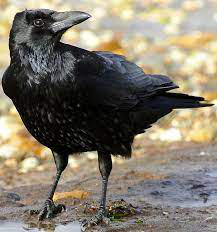

In [48]:
crow_test_image = image.load_img(r"C:\Users\Siri\Anaconda_files\Crow_test_image.jpeg")
print("Test crow image before compression:")
crow_test_image

Test crow image after compression:


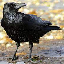

In [49]:
print("Test crow image after compression:")
crow_test_image = image.load_img(r"C:\Users\Siri\Anaconda_files\Crow_test_image.jpeg", target_size = (64, 64))
crow_test_image

In [50]:
crow_image_array = image.img_to_array(crow_test_image)
crow_image_array = np.expand_dims(crow_image_array, axis = 0)
crow_pred = model.predict(crow_image_array)
crow_pred_class = np.argmax(crow_pred, axis = 1)
result = str(index[crow_pred_class[0]])
print("The model has predicted the image as", result)

1/1 [==============================] - 0s 27ms/step
The model has predicted the image as crows
